In [18]:
# tools
import pandas as pd
import numpy as np

# graph
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

# framework
import h2o
from h2o.automl import H2OAutoML

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [19]:
# Start the H2O cluster (locally)
h2o.init(
    nthreads=-1,
    max_mem_size_GB = 4
)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 19.0.1+10-21, mixed mode, sharing)
  Starting server from C:\Users\PV\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\PV\AppData\Local\Temp\tmp95_ekura
  JVM stdout: C:\Users\PV\AppData\Local\Temp\tmp95_ekura\h2o_PV_started_from_python.out
  JVM stderr: C:\Users\PV\AppData\Local\Temp\tmp95_ekura\h2o_PV_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Ho_Chi_Minh
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_PV_tilgtx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [20]:
#initial information
path = "C:\\Users\\PV\\OneDrive\\Documents\\ehhhh\\Machine Learning\\data_poll\\"

rd_seed = 173808

In [21]:
df = h2o.import_file(path=path + 'copy_of_ys1a.csv')

X_train, X_test, valid = df.split_frame(ratios=[.6, .2], seed=rd_seed)

X_train

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


vec,deltachi,delta,deltahmix,deltasmix,ys
9,0.0329983,0.327647,-1.33333,9.13437,204
8.61538,0.0324903,2.02528,-11.8343,10.6865,196
8.28571,0.0319438,2.65771,-19.4286,11.2394,476
8.53846,0.077,3.94493,-6.05917,10.6865,158
8.14286,0.0970798,5.12318,-9.46939,11.2394,346
8.25,0.0966954,0.302116,-3.75,11.5263,148
8.16841,0.101488,2.29778,-5.47301,12.2121,318
8.09082,0.105577,3.14608,-7.02481,12.5872,403
7.2,0.120565,5.77789,-12.32,13.3816,1051
7.2,0.120565,5.77789,-12.32,13.3816,1138


In [22]:
X_test

vec,deltachi,delta,deltahmix,deltasmix,ys
9,0.0329983,0.327647,-1.33333,9.13437,209
9,0.0329983,0.327647,-1.33333,9.13437,211
7.8,0.10939,5.80498,-11.9467,11.4681,794
8.12876,0.103631,2.77092,-6.27664,12.4206,322
8.01694,0.109094,3.74353,-8.42376,12.8452,479
7.94651,0.112136,4.20566,-9.68594,13.0299,638
7.2,0.119184,5.53843,-11.3975,12.796,2033
7.2,0.120565,5.77789,-12.32,13.3816,1251
7.13725,0.160337,8.00993,-15.3479,13.9216,957
6.90909,0.249939,13.1723,-25.2562,14.698,1060


In [23]:
x_label = X_train.columns
y_label = "ys"
x_label.remove(y_label)

In [24]:
aml = H2OAutoML(
    nfolds = 10, 
    max_models=33, 
    sort_metric='RMSE',
    exclude_algos = ["DeepLearning"],
    seed=rd_seed,
    keep_cross_validation_predictions= True,
    keep_cross_validation_fold_assignment=True
)

aml.train(x=x_label, y=y_label, training_frame=X_train)

AutoML progress: |
22:30:30.121: AutoML: XGBoost is not available; skipping it.


22:30:30.919: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 121.0.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20221217_223030


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    46                 46                          23260                  6            6            6             24            44            35.587

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2263.824746443045
RMSE: 47.57966736372844
MAE: 30.659466830166902
RMSLE: 0.04466923059558606
Mean Residual Deviance: 2263.824746443045

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 83548.68156706792
RMSE: 289.047888016965
MAE: 201.7722744053857
RMSLE: 0.3196972666229069
Mean Residual Deviance: 83548.68156706792

Cross-Validation Metrics Summary: 
                        mean      sd        cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  --------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     203.016   60.4652   187.973       172.378       238.759       184.839       274.443       176.139       332.702       168.149       140.888       153.891
mean_residual_deviance  84893     63968.8   80868.1       43005         86781.4       72137.4       181249        47807.1       218768        44906.3       30994.9       42412.3
mse                     84893     63968.8   80868.1       43005         86781.4       72137.4       181249        47807.1       218768        44906.3       30994.9       42412.3
r2                      0.73775   0.203297  0.614356      0.887081      0.763001      0.70282       0.289081      0.880495      0.551803      0.885189      0.921067      0.882611
residual_deviance       84893     63968.8   80868.1       43005         86781.4       72137.4       181249        47807.1       218768        44906.3       30994.9       42412.3
rmse                    276.094   98.1229   284.373       207.377       294.587       268.584       425.734       218.648       467.727       211.911       176.054       205.943
rmsle                   0.297711  0.124761  0.206065      0.269929      0.288109      0.351547      0.559878      0.34821       0.407543      0.213108      0.204543      0.128173

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2022-12-17 22:30:35  0.714 sec   0                  612.967          478.483         375728
    2022-12-17 22:30:35  0.723 sec   5                  390.456          304.056         152456
    2022-12-17 22:30:35  0.768 sec   10                 252.703          200.454         63859
    2022-12-17 22:30:35  0.780 sec   15                 171.568          137.418         29435.5
    2022-12-17 22:30:35  0.787 sec   20                 119.091          95.563          14182.6
    2022-12-17 22:30:35  0.800 sec   25                 91.2109          71.686          8319.44
    2022-12-17 22:30:35  0.810 sec   30                 73.8914          56.7111         5459.94
    2022-12-17 22:30:35  0.821 sec   35                 61.7716          46.2463         3815.73
    2022-12-17 22:30:35  0.829 sec   40                 54.2193          38.1357         2939.73
    2022-12-17 22:30:35  0.837 sec   45                 48.3291          31.4775         2335.7
    2022-12-17 22:30:35  0.840 sec   46                 47.5797          30.6595         2263.82

Variable Importances: 
variable    relat

In [25]:
# Get leaderboard with all possible columns
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb.head(rows= lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_5_AutoML_1_20221217_223030,289.048,83548.7,201.772,0.319697,83548.7,129,0.028853,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20221217_223030,290.283,84264,205.113,0.314023,84264,588,0.063789,StackedEnsemble
XRT_1_AutoML_1_20221217_223030,292.02,85275.5,212.819,0.333196,85275.5,77,0.010162,DRF
GBM_grid_1_AutoML_1_20221217_223030_model_2,292.24,85404.2,210.543,0.301928,85404.2,134,0.01643,GBM
GBM_grid_1_AutoML_1_20221217_223030_model_21,292.934,85810.1,211.978,0.314044,85810.1,147,0.00838,GBM
GBM_grid_1_AutoML_1_20221217_223030_model_17,293.339,86047.9,217.823,0.342516,86047.9,137,0.012276,GBM
DRF_1_AutoML_1_20221217_223030,297.694,88621.5,218.636,0.344592,88621.5,104,0.007909,DRF
StackedEnsemble_AllModels_1_AutoML_1_20221217_223030,299.283,89570.4,214.197,0.321857,89570.4,826,0.091007,StackedEnsemble
GBM_grid_1_AutoML_1_20221217_223030_model_12,300.843,90506.5,215.764,0.335093,90506.5,57,0.016931,GBM
GBM_grid_1_AutoML_1_20221217_223030_model_8,302.964,91787.5,217.813,0.33668,91787.5,139,0.008619,GBM


In [26]:
model_df = h2o.as_list(lb, use_pandas=True)
model_df['algo'].value_counts()

GBM                25
StackedEnsemble     2
DRF                 2
GLM                 1
Name: algo, dtype: int64

In [27]:
# Get training timing info
info = aml.training_info
info

{'creation_epoch': '1671291030',
 'start_epoch': '1671291030',
 'start_GLM_def_1': '1671291030',
 'start_GBM_def_5': '1671291031',
 'start_DRF_def_1': '1671291031',
 'start_GBM_def_2': '1671291032',
 'start_GBM_def_3': '1671291033',
 'start_GBM_def_4': '1671291033',
 'start_DRF_XRT': '1671291034',
 'start_GBM_def_1': '1671291035',
 'start_GBM_grid_1': '1671291036',
 'start_completion_GBM_grid_1': '1671291047',
 'start_GBM_lr_annealing': '1671291047',
 'start_StackedEnsemble_best_of_family_xglm': '1671291049',
 'start_StackedEnsemble_all_xglm': '1671291049',
 'stop_epoch': '1671291050',
 'duration_secs': '20'}

In [32]:
y_pred = aml.predict(X_test)

# best model perdiction
y_pred_list = h2o.as_list(y_pred, use_pandas=False)
y_pred_df = h2o.as_list(y_pred)

y_true_list = h2o.as_list(X_test['ys'], use_pandas=False)
y_true_df = h2o.as_list(X_test['ys'])

data_as_df = pd.concat([y_true_df, y_pred_df], axis=1)

data_as_df

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,ys,predict
0,209.0,215.076467
1,211.0,215.076467
2,794.0,583.181395
3,322.0,406.767841
4,479.0,349.806514
5,638.0,376.849869
6,2033.0,1361.483717
7,1251.0,1162.613437
8,957.0,1468.328835
9,1060.0,1176.471293


In [34]:
y_pred_list

[['predict'],
 ['215.0764667311978'],
 ['215.0764667311978'],
 ['583.1813947478604'],
 ['406.7678406903815'],
 ['349.806513778336'],
 ['376.8498693624806'],
 ['1361.4837168673348'],
 ['1162.6134370783639'],
 ['1468.32883476413'],
 ['1176.471293441422'],
 ['1436.891531757481'],
 ['1387.9617634186816'],
 ['794.1154952714514'],
 ['333.3492738673758'],
 ['1483.6303923050236'],
 ['1154.7489676991772'],
 ['1112.701857320435'],
 ['1096.4943284312558'],
 ['582.3966094771695'],
 ['988.3204102585387'],
 ['1570.709852031834'],
 ['440.72303705143895'],
 ['1460.9051963756156'],
 ['1492.1099124564153'],
 ['1209.5311255673241'],
 ['1193.7833276609254'],
 ['1598.2169343972873'],
 ['1015.7246450729963'],
 ['1222.7269664177966'],
 ['1293.5446092937436'],
 ['1655.6276489798274'],
 ['1116.1644999780056'],
 ['1616.289769723482'],
 ['1092.2464115325656'],
 ['1092.2464115325656'],
 ['380.3263979176354'],
 ['379.0664022783112'],
 ['1700.7099381605458']]

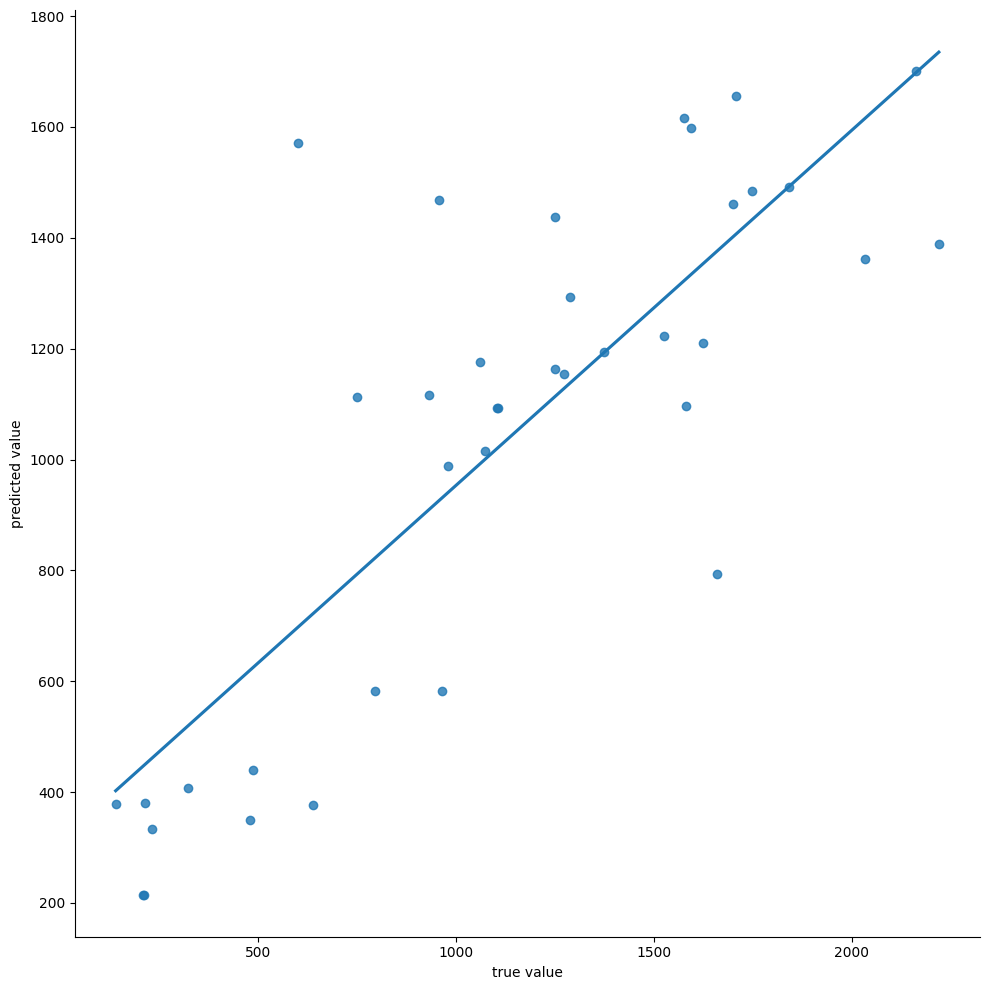

In [29]:
ax = sns.lmplot(x='ys', y='predict', data=data_as_df, height=10, ci=None)
ax.set(xlabel='true value', ylabel='predicted value')

ax

In [30]:
best_model = aml.get_best_model()
best_model

h2o.save_model(best_model, path='C:\\Users\\PV\\OneDrive\\Documents\\ehhhh\\Machine Learning\\h2o')

'C:\\Users\\PV\\OneDrive\\Documents\\ehhhh\\Machine Learning\\h2o\\GBM_5_AutoML_1_20221217_223030'